# Various Regression Models for the problem below

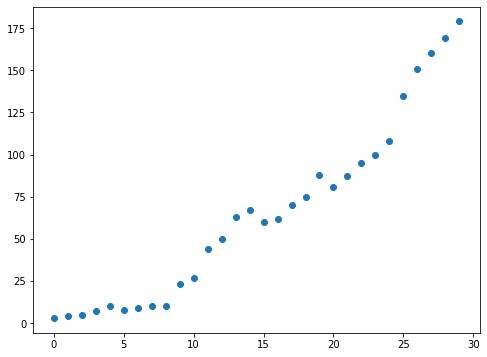

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x = np.arange(0, 30)
y = [3, 4, 5, 7, 10, 8, 9, 10, 10, 23, 27, 44, 50, 63, 67, 60, 62, 70, 75, 88, 81, 87, 95, 100, 108, 135, 151, 160, 169, 179]
plt.figure(figsize=(8,6))
plt.scatter(x, y)
plt.show()

/home/pmi/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pmi/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


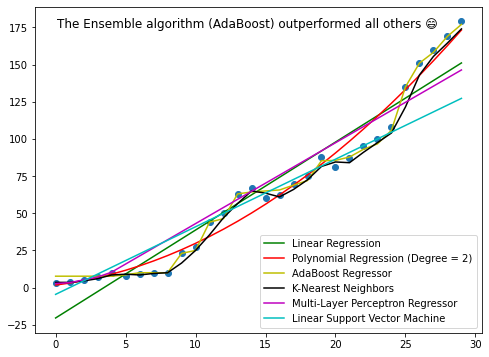

In [62]:
# importing the necessary libraries
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn.linear_model import LinearRegression as lr
from sklearn.ensemble import AdaBoostRegressor as ab
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.neural_network import MLPRegressor as mlpr
from sklearn.svm import LinearSVR as lsvr

# preparing the polynomial features for the polynomial regression model
polyFeat = pf(degree=2, include_bias=False)
features = polyFeat.fit_transform(x.reshape(-1, 1))

# instantiating the models
linear_model, polynomial_model, adaboost_model = lr(), lr(), ab(random_state=0, n_estimators=100)
knn_model, mlpr_model, lsvr_model = knn(n_neighbors=2), mlpr(random_state=1, max_iter=1000), lsvr(random_state=0, tol=1e-5)
 
# training the models    
linear_model.fit(x.reshape(-1, 1), y)
polynomial_model.fit(features, y)
adaboost_model.fit(x.reshape(-1, 1), y)
knn_model.fit(x.reshape(-1, 1), y)
mlpr_model.fit(x.reshape(-1, 1), y)
lsvr_model.fit(x.reshape(-1, 1), y)

# using the trained models to make predictions
y_pred_from_linear_model = linear_model.predict(x.reshape(-1, 1))
y_pred_from_polynomial_model = polynomial_model.predict(features)
y_pred_from_adaboost_model = adaboost_model.predict(x.reshape(-1, 1))
y_pred_from_knn_model = knn_model.predict(x.reshape(-1, 1))
y_pred_from_mlpr_model = mlpr_model.predict(x.reshape(-1, 1))
y_pred_from_lsvr_model = lsvr_model.predict(x.reshape(-1, 1))

# visualising the models using plt method (implicit)
plt.figure(figsize=(8,6))
plt.scatter(x, y)
plt.plot(x, y_pred_from_linear_model, color="g", label="Linear Regression")
plt.plot(x, y_pred_from_polynomial_model, color="r", label="Polynomial Regression (Degree = 2)")
plt.plot(x, y_pred_from_adaboost_model, color="y", label="AdaBoost Regressor")
plt.plot(x, y_pred_from_knn_model, color="k", label="K-Nearest Neighbors")
plt.plot(x, y_pred_from_mlpr_model, color="m", label="Multi-Layer Perceptron Regressor")
plt.plot(x, y_pred_from_lsvr_model, color="c", label="Linear Support Vector Machine")
plt.legend(loc='lower right')
plt.text(0.1, 175, "The Ensemble algorithm (AdaBoost) outperformed all others 😄", fontsize=12)
plt.savefig("RegressionModels1", dpi=1200)
plt.show()

# Repeating the same code in a more pythonic way

/home/pmi/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pmi/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


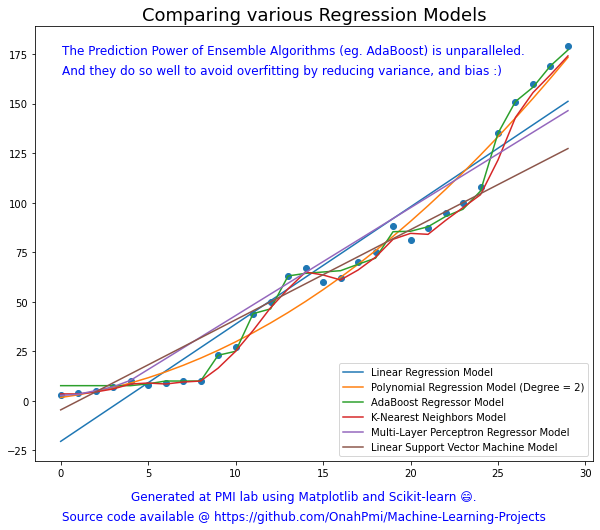

In [63]:
# importing the necessary libraries
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn.linear_model import LinearRegression as lr
from sklearn.ensemble import AdaBoostRegressor as ab
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.neural_network import MLPRegressor as mlpr
from sklearn.svm import LinearSVR as lsvr

# preparing the polynomial features for the polynomial regression model
polyFeat = pf(degree=2, include_bias=False)
features = polyFeat.fit_transform(x.reshape(-1, 1))

# instantiating the models
linear_model, polynomial_model, adaboost_model = lr(), lr(), ab(random_state=0, n_estimators=100)
knn_model, mlpr_model, lsvr_model = knn(n_neighbors=2), mlpr(random_state=1, max_iter=1000), lsvr(random_state=0, tol=1e-5)

label_vs_predicted_values=[("Linear Regression Model", linear_model.fit(x.reshape(-1, 1), y).predict(x.reshape(-1, 1))),
                  ("Polynomial Regression Model (Degree = 2)", polynomial_model.fit(features, y).predict(features)), 
                  ("AdaBoost Regressor Model", adaboost_model.fit(x.reshape(-1, 1), y).predict(x.reshape(-1, 1))),
                  ("K-Nearest Neighbors Model", knn_model.fit(x.reshape(-1, 1), y).predict(x.reshape(-1, 1))), 
                  ("Multi-Layer Perceptron Regressor Model", mlpr_model.fit(x.reshape(-1, 1), y).predict(x.reshape(-1, 1))),
                  ("Linear Support Vector Machine Model", lsvr_model.fit(x.reshape(-1, 1), y).predict(x.reshape(-1, 1)))]

fig, ax=plt.subplots(figsize=(10,8))
ax.scatter(x, y)

for label, value in label_vs_predicted_values:
    ax.plot(x, value, label=label)

ax.legend(loc='lower right')
ax.text(0.1, 175, "The Prediction Power of Ensemble Algorithms (eg. AdaBoost) is unparalleled.", fontsize=12, color="b")
ax.text(0.1, 165, "And they do so well to avoid overfitting by reducing variance, and bias :)", fontsize=12, color="b") 
ax.text(4, -50, "Generated at PMI lab using Matplotlib and Scikit-learn 😄.", fontsize=12, color="b")
ax.text(0.1, -60, "Source code available @ https://github.com/OnahPmi/Machine-Learning-Projects", fontsize=12, color="b")
ax.set_title("Comparing various Regression Models", fontsize=18)
fig.savefig("RegressionModels2", dpi=1200)
fig.show() 